# Texas Salary Prediction

* The Texas state government employs a workforce across multiple agencies, roles, and employment statuses. Accurately predicting employee salaries is essential for budgeting, equity analysis, and operational efficiency. The dataset includes key attributes such as agency, class title, ethnicity, gender, hours worked, and multiple-job roles, offering a rich basis for building predictive models.



## Domain Analysis

In [1]:
import pandas as pd # for data manipulation and analysis
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt # for visualizing data
import seaborn as sns # for statistical data visualization
import warnings # to handle warning messages
warnings.filterwarnings("ignore") # suppress warnings from output
from ydata_profiling import ProfileReport # for generating automated EDA report

In [3]:
df = pd.read_csv('salary.csv') # load the dataset from CSV file

In [4]:
data = pd.read_csv('salary.csv')

In [7]:
df # display the DataFrame

AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  ... HRLY RATE  HRS PER WK  \
0       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
1       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04454         4.0   
2       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
3       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04453         4.0   
4       CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
...                                          ...  ...       ...         ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149477  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149478  CRP - CLASSIFIED REGULAR PART-TIME        ...  12.93000        20.0   
149479  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000       

In [9]:
pd.set_option('display.max_columns', None)    #expand the all columns # configure pandas to display all columns

In [11]:
df # display the DataFrame

AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS EMPLOY DATE  HRLY RATE  \
0       URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88   75.96150   
1       CTP - CLASSIFIED TEMPORARY PART-TIME        02/01/15   81.04454   
2       URP - UNCLASSIFIED REGULAR PART-TIME        02/01/20   75.96150   
3       CTP - CLASSIFIED TEMPORARY PART-TIME        09/01/18   81.04453   
4       CRF - CLASSIFIED REGULAR FULL-TIME          06/29/20    0.00000   
...                                          ...         ...        ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME          10/30/17    0.00000   
149477  CRF - CLASSIFIED REGULAR FULL-TIME          07/13/15    0.00000   
149478  CRP - CLASSIFIED REGULAR PART-TIME          10/15/12   12.93000   
149479  CRF - CLASSIFIED REGULAR FULL-TIME          09/22/89    0.00000   
149480  CRP - CLASSIFIED REGULAR PA

## Feature Information

1. **AGENCY**: The name of the organization or government body that the employee works for.
2. **AGENCY NAME**: The specific agency within the larger organization.
3. **LAST NAME**: The employee's last name.
4. **FIRST NAME**: The employee's first name.
5. **MI (Middle Initial)**: The employee's middle initial, if applicable.
6. **CLASS CODE**: A code identifying the employee's job classification.
7. **CLASS TITLE**: The title or description of the employee's job.
8. **ETHNICITY**: The employee's ethnic background.
9. **GENDER**: The employee's gender.
10. **STATUS**: The employment status of the individual (e.g., full-time, part-time, contract).
11. **EMPLOY DATE**: The date the employee was hired.
12. **HRLY RATE**: The employee’s hourly pay rate.
13. **HRS PER WK**: The number of hours the employee works per week.
14. **MONTHLY**: The employee's monthly salary.
15. **ANNUAL**: The employee's annual salary.
16. **STATE NUMBER**: Likely refers to a state or employee identification number.
17. **duplicated**: A flag that may indicate if the employee record is a duplicate.
18. **multiple_full_time_jobs**: Whether the employee holds more than one full-time job.
19. **combined_multiple_jobs**: The combined salary for employees holding multiple jobs.
20. **summed_annual_salary**: The total salary after summing across jobs or positions.
21. **hide_from_search**: Whether the record is hidden from search results for privacy or security reasons.


In [15]:
df.rename(columns={'AGENCY NAME': 'AGENCY_NAME','LAST NAME':'LAST_NAME','FIRST NAME':'FIRST_NAME','CLASS CODE':'CLASS_CODE','CLASS TITLE':'CLASS_TITLE',
                    'HRLY RATE':'HRLY_RATE','HRS PER WK':'HRS_PER_WK','STATE NUMBER':'STATE_NUMBER',}, inplace=True)

## Basic Check

In [18]:
## It show first five rows of the dataset.
df.head()

AGENCY                                        AGENCY_NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   
2     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3     212  OFFICE OF COURT ADMINISTRATION                ...   
4     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                        LAST_NAME                      FIRST_NAME MI  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   
2  SPECIA JR                       JOHN                            J   
3  SPECIA JR                       JOHN                            J   
4  ONTIVEROS                       ESTHER                              

  CLASS_CODE                                        CLASS_TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
2  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
3  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
4  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME         

  EMPLOY DATE  HRLY_RATE  HRS_PER_WK  MONTHLY     ANNUAL  STATE_NUMBER  \
0    02/18/88   75.96150        29.0  9545.82  114549.84        127717   
1    02/01/15   81.04454         4.0  1404.77   16857.24        127717   
2    02/01/20   75.96150        29.0  9545.82  114549.84         59115   
3    09/01/18   81.04453         4.0  1404.77   16857.24         59115   
4    06/29/20    0.00000        40.0  3284.27   39411.24        165030   

  duplicated  multiple_full_time_jobs combined_multiple_jobs  \
0       True                      NaN                    NaN   
1       True                      NaN                    NaN   
2       True                      NaN                    NaN   
3       True                      NaN                    NaN   
4       True                      1.0                    NaN   

   summed_annual_salary hide_from_search  
0             131407.08              NaN  
1                   NaN             True  
2             131407.08              NaN  
3                   NaN             True  
4                   NaN              NaN

In [20]:
## It show last five rows of the dataset.
df.tail()

AGENCY                                        AGENCY_NAME  \
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST_NAME                      FIRST_NAME MI  \
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS_CODE                                        CLASS_TITLE  \
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS EMPLOY DATE  HRLY_RATE  \
149476  CRF - CLASSIFIED REGULAR FULL-TIME          10/30/17       0.00   
149477  CRF - CLASSIFIED REGULAR FULL-TIME          07/13/15       0.00   
149478  CRP - CLASSIFIED REGULAR PART-TIME          10/15/12      12.93   
149479  CRF - CLASSIFIED REGULAR FULL-TIME          09/22/89       0.00   
149480  CRP - CLASSIFIED REGULAR PART-TIME          02/16/12      11.74   

        HRS_PER_WK  MONTHLY    ANNUAL  STATE_NUMBER duplicated  \
149476        40.0  2899.00  34788.00        770781        NaN   
149477        40.0  5500.00  66000.00        847431        NaN   
149478        20.0  1120.60  13447.20         34266        NaN   
149479        40.0  5744.16  68929.92        123490        NaN   
149480        20.0  1017.46  12209.52        103583        NaN   

        multiple_full_time_jobs combined_multiple_jobs  summed_annual_salary  \
149476                      NaN                    NaN                   NaN   
149477                      NaN                    NaN                   NaN   
149478                      NaN                    NaN                   NaN   
149479                      NaN                    NaN                   NaN   
149480                      NaN                    NaN                   NaN   

       hide_from_search  
149476              NaN  
149477              NaN  
149478              NaN  
149479              NaN  
149480              NaN

In [22]:
# Display summary information about the DataFrame.
df.info() # display info about DataFrame structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY_NAME              149481 non-null  object 
 2   LAST_NAME                149481 non-null  object 
 3   FIRST_NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS_CODE               149481 non-null  object 
 6   CLASS_TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY_RATE                149481 non-null  float64
 12  HRS_PER_WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [24]:
## It show the statistical information of data.
df.describe(include = "O")

AGENCY_NAME  \
count                                              149481   
unique                                                113   
top     HEALTH AND HUMAN SERVICES COMMISSION          ...   
freq                                                36667   

                             LAST_NAME                      FIRST_NAME  \
count                           149481                          149481   
unique                           38675                           23559   
top     SMITH                           MICHAEL                          
freq                              1243                            1843   

            MI CLASS_CODE                                        CLASS_TITLE  \
count   149481     149481                                             149481   
unique      27       1481                                               1422   
top              4504      CORREC  OFFICER IV                            ...   
freq     38408       9267                                               9267   

              ETHNICITY           GENDER  \
count            149481           149481   
unique                6                2   
top     WHITE            FEMALE            
freq              67142            85328   

                                          STATUS EMPLOY DATE duplicated  \
count                                     149481      149481        143   
unique                                        11        6295          1   
top     CRF - CLASSIFIED REGULAR FULL-TIME          09/01/17       True   
freq                                      142502       12359        143   

       combined_multiple_jobs hide_from_search  
count                      97               16  
unique                      1                1  
top                      True             True  
freq                       97               16

In [26]:
## It show the statistical information of data.
df.describe() # statistical summary of the dataset

AGENCY      HRLY_RATE     HRS_PER_WK        MONTHLY  \
count  149481.000000  149481.000000  149481.000000  149481.000000   
mean      545.736288       0.346488      39.714918    4226.184248   
std       139.057691       4.211485       2.323855    2093.111691   
min       101.000000       0.000000       1.000000      50.000000   
25%       529.000000       0.000000      40.000000    3019.840000   
50%       530.000000       0.000000      40.000000    3720.170000   
75%       696.000000       0.000000      40.000000    4865.810000   
max       930.000000     117.788480      70.000000   46125.000000   

              ANNUAL  STATE_NUMBER  multiple_full_time_jobs  \
count  149481.000000  1.494810e+05                     14.0   
mean    50714.210973  5.651930e+05                      1.0   
std     25117.340292  4.786212e+05                      0.0   
min       600.000000  1.000000e+00                      1.0   
25%     36238.080000  1.133340e+05                      1.0   
50%     44642.040000  3.463730e+05                      1.0   
75%     58389.720000  1.100500e+06                      1.0   
max    553500.000000  1.271604e+06                      1.0   

       summed_annual_salary  
count             16.000000  
mean           74303.955000  
std            51925.944282  
min            18000.000000  
25%            32962.500000  
50%            48063.300000  
75%           123751.770000  
max           171383.400000

In [28]:
# Here,we are drop to not need of column.
df.drop(columns=['AGENCY','LAST_NAME','EMPLOY DATE','FIRST_NAME','MI','duplicated','multiple_full_time_jobs','combined_multiple_jobs','summed_annual_salary','hide_from_search'],axis=1,inplace=True)

* The dataset shows a diverse workforce with significant variation in hourly rates, most employees working close to 40 hours per week, and a wide salary range from 600 to 5,53,500 annually, indicating both low and high-paying positions, with many employees earning relatively low wages.

## Exploratory Data Anlaysis

* > EDA is a crucial step in the data analysis process. It involves exploring the dataset to gain a deeper understanding of its characteristics, patterns, and underlying structure. The primary goals of EDA are to summarize the key attributes of the dataset, identify relationships between variables, detect anomalies, and check assumptions. This step helps ensure that the data is clean and prepared for further analysis or modeling.
  > * There are three type of EDA :-

        1) Univariate Analysis
        2) Bivariate Analysis
        3) Multivariate Analysis

## Step:- 1 Univariate Analysis

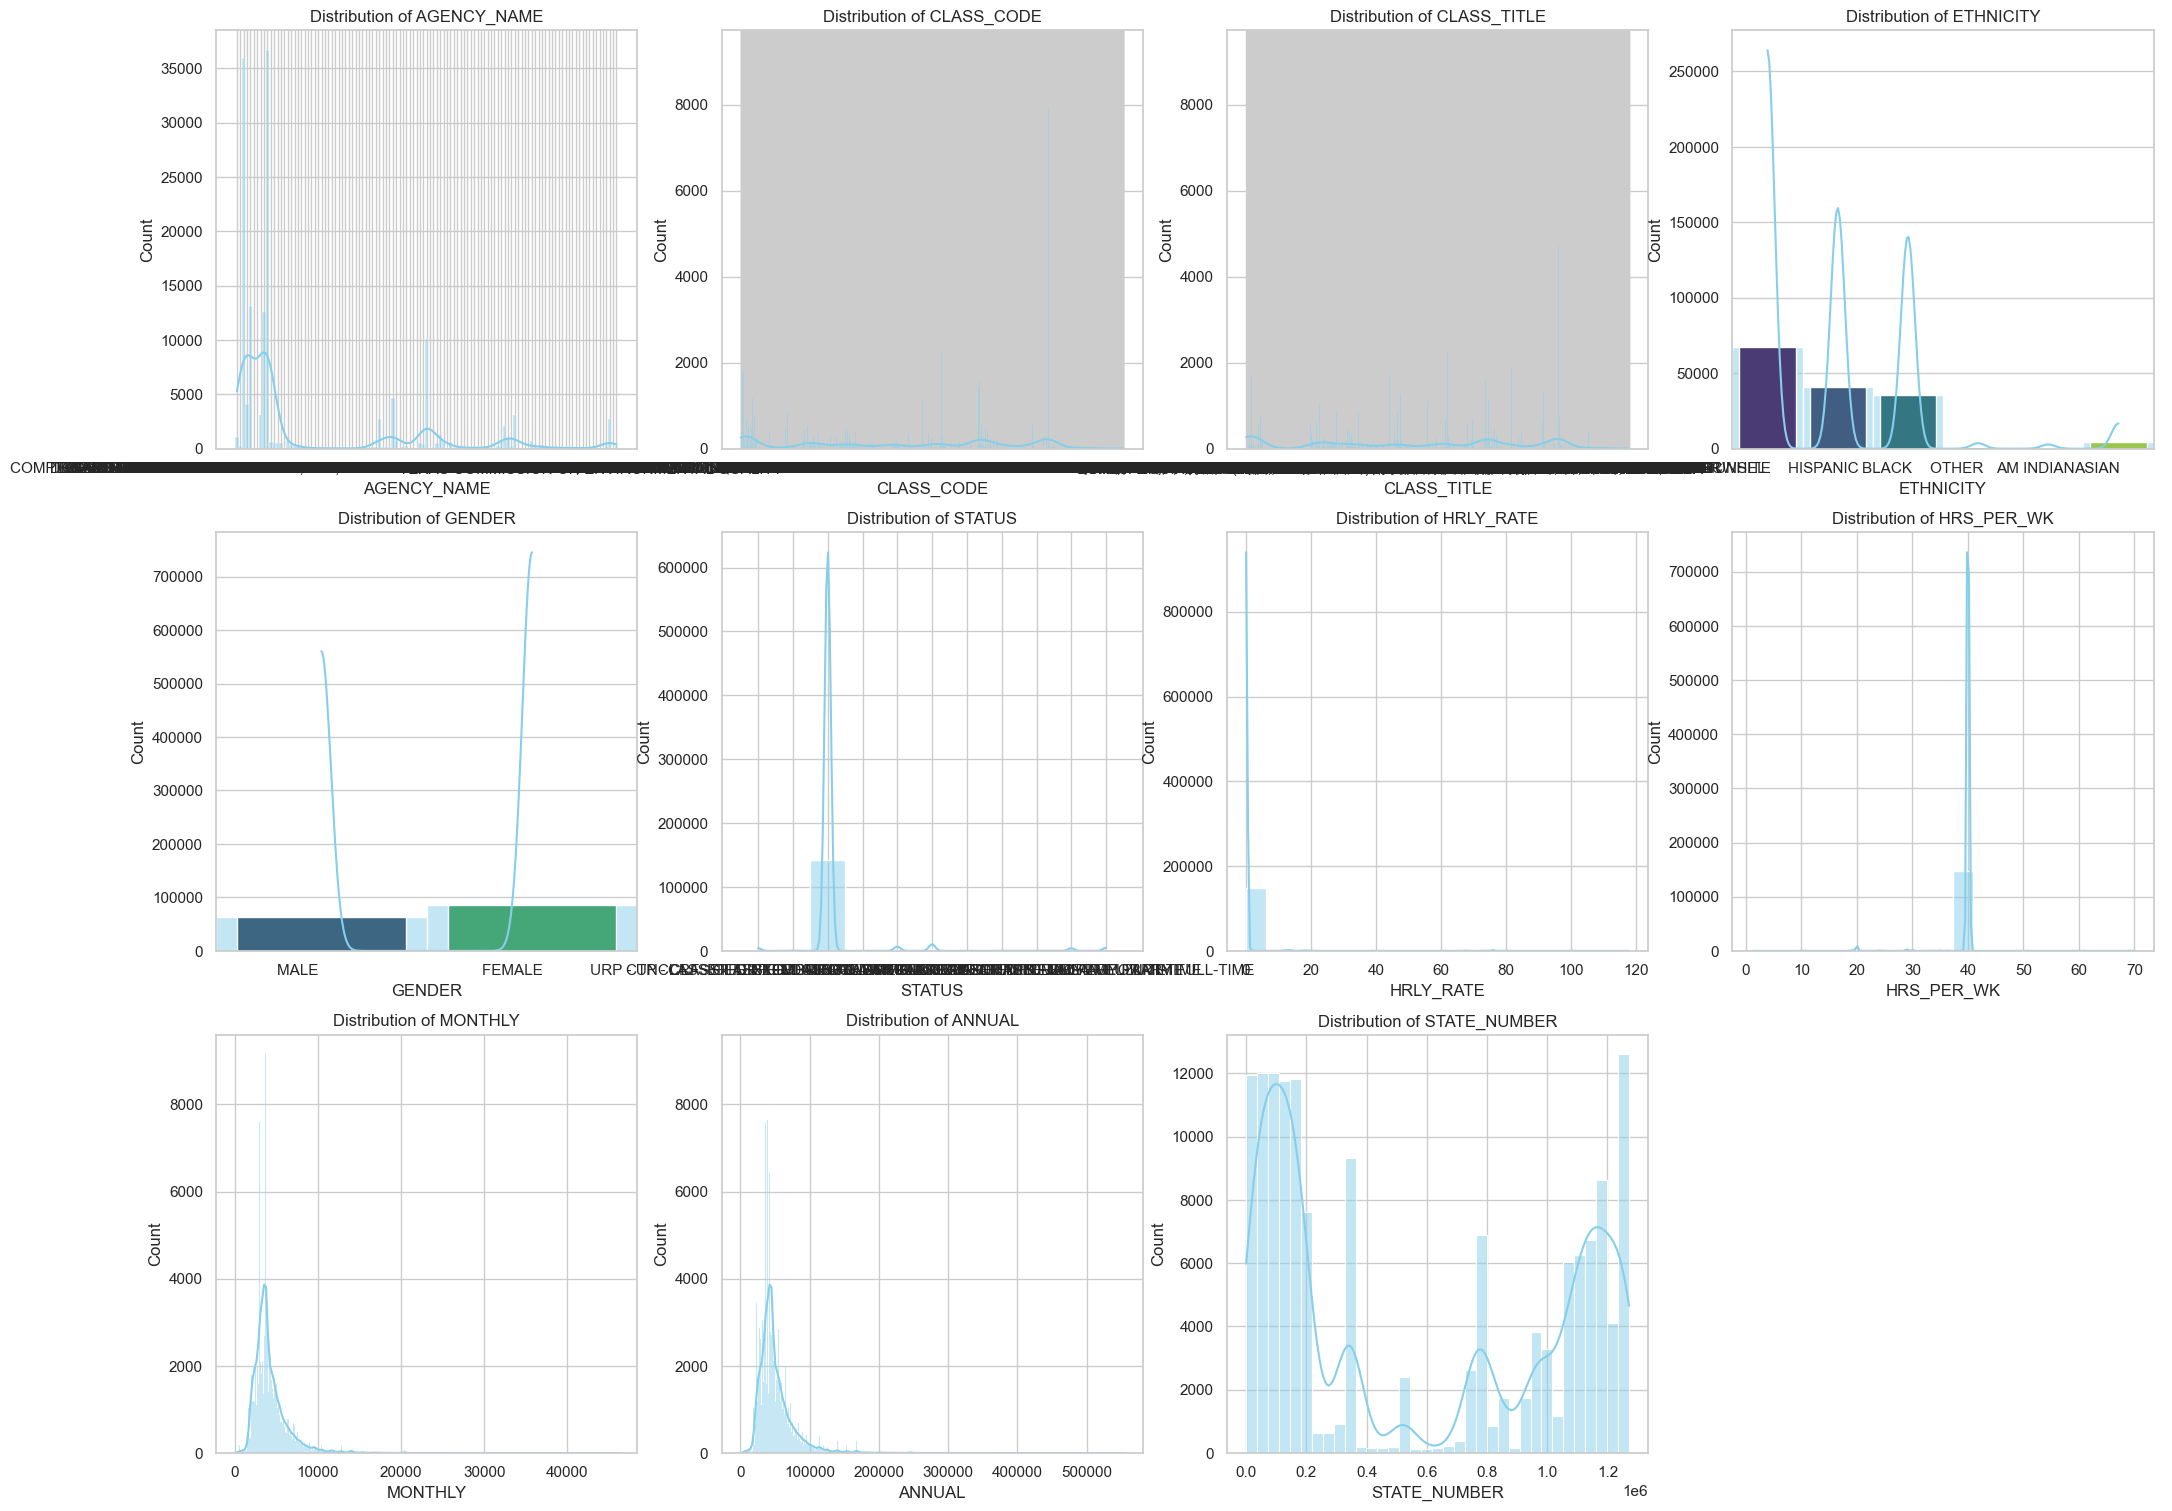

In [35]:
# Set plot style
sns.set(style="whitegrid") # visualize data using seaborn
plt.figure(figsize=(25,25)) # visualize data using matplotlib

num = 1

for i in df:
    plt.subplot(4,4,num) # visualize data using matplotlib
    if num <= 16:
        sns.histplot(data=df[i], kde=True, color='skyblue') # visualize data using seaborn
        if df[i].nunique() <= 10:
            sns.countplot(data=df,x=i, palette='viridis') # visualize data using seaborn
        plt.title(f'Distribution of {i}') # visualize data using matplotlib
        plt.xlabel(i) # visualize data using matplotlib
        plt.ylabel('Count') # visualize data using matplotlib
    num += 1
    
# plt.tight_layout() # visualize data using matplotlib
plt.show() # visualize data using matplotlib

* By Analysis we can say that most variables show right-skewed distribution,indicating a concentratin of data points in the lower range.The majority of employees earn low hourly rates, with a few extreme outliers earning significantly higher wages.Most employees work close to the standard 40 hours per week, with minimal variation.

## Step:-2 Bivariate Analysis

#### Bivariate Analysis refers to plots between input variables and target variable.Analyze the relationship between two variables.

<Axes: xlabel='GENDER', ylabel='ANNUAL'>

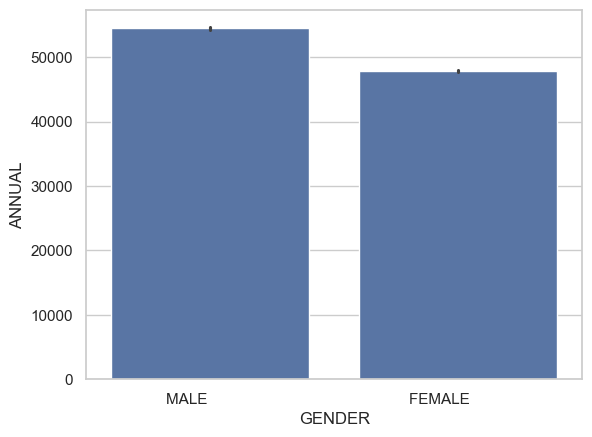

In [40]:
## Aanlyzing the relationship between GENDER and ANNUAL.
sns.barplot(x="GENDER",y="ANNUAL",data=df) # visualize data using seaborn

* By analysis we can say that male have the highest annual income compared to female.

<Axes: xlabel='HRS_PER_WK', ylabel='MONTHLY'>

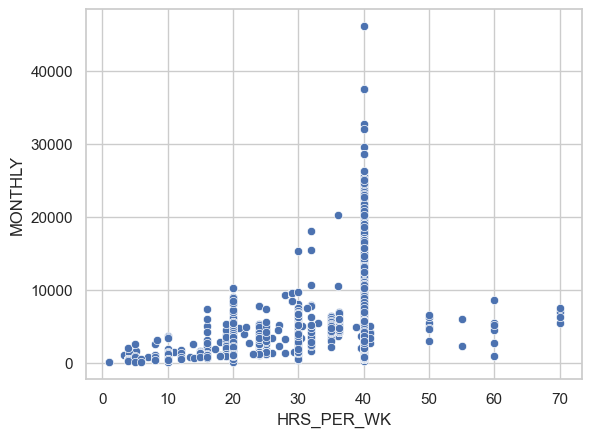

In [43]:
## Aanlyzing the relationship between HRS PER WK and MONTHLY.
sns.scatterplot(x="HRS_PER_WK",y="MONTHLY",data=df) # visualize data using seaborn

* By analysis we can say that monthly income of someone who works 40 hours a week is higher than that of someone who works other hours.

<Axes: xlabel='GENDER', ylabel='MONTHLY'>

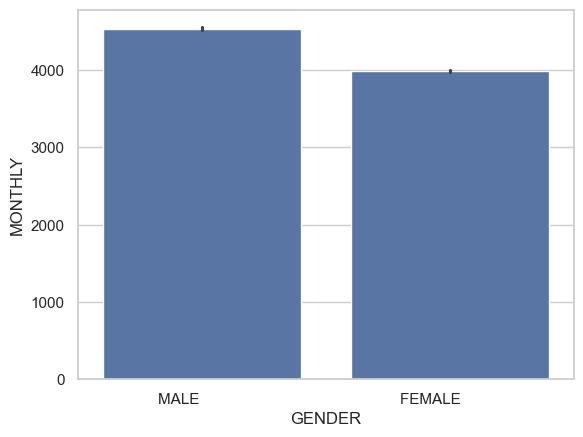

In [46]:
## Aanlyzing the relationship between GENDER and MONTHLY.
sns.barplot(x="GENDER",y="MONTHLY",data=df) # visualize data using seaborn

* By analysis we can say that male have the highest monthly income compared to female.

## Step:- 3 Multivariante Analysis

In [50]:
## Analyze the relationship in all columns.

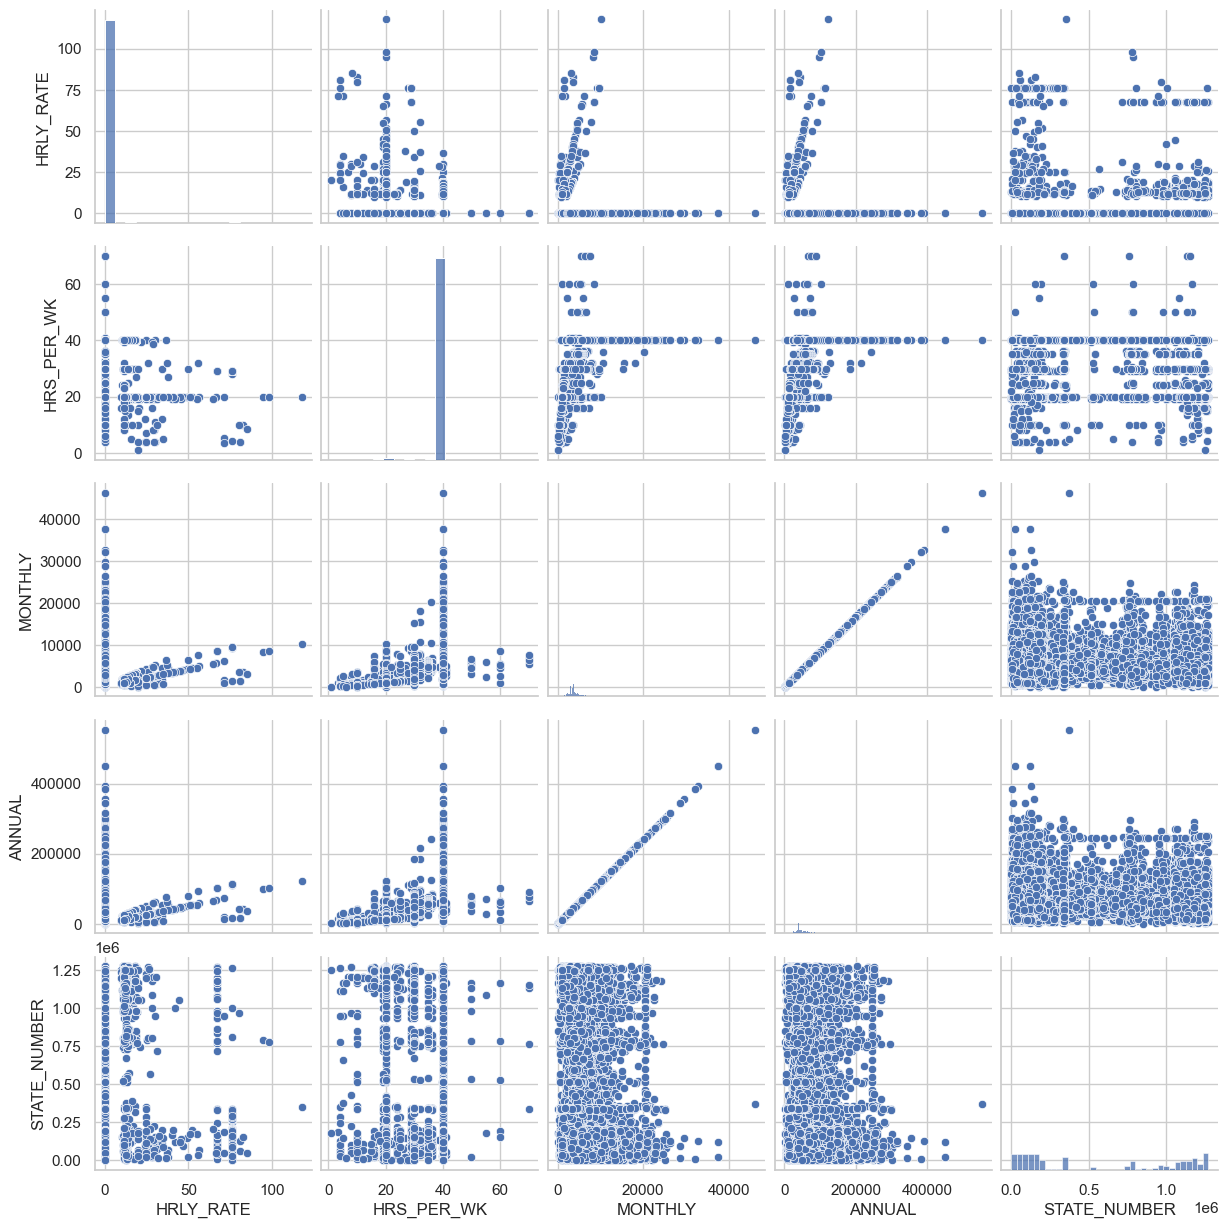

In [52]:
sns.pairplot(data=df) # visualize data using seaborn

#### We can also use PandasProfiling to get insight from data

In [55]:
profile = ProfileReport(df, title="Pandas Profiling Report") # for generating automated EDA report

In [57]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

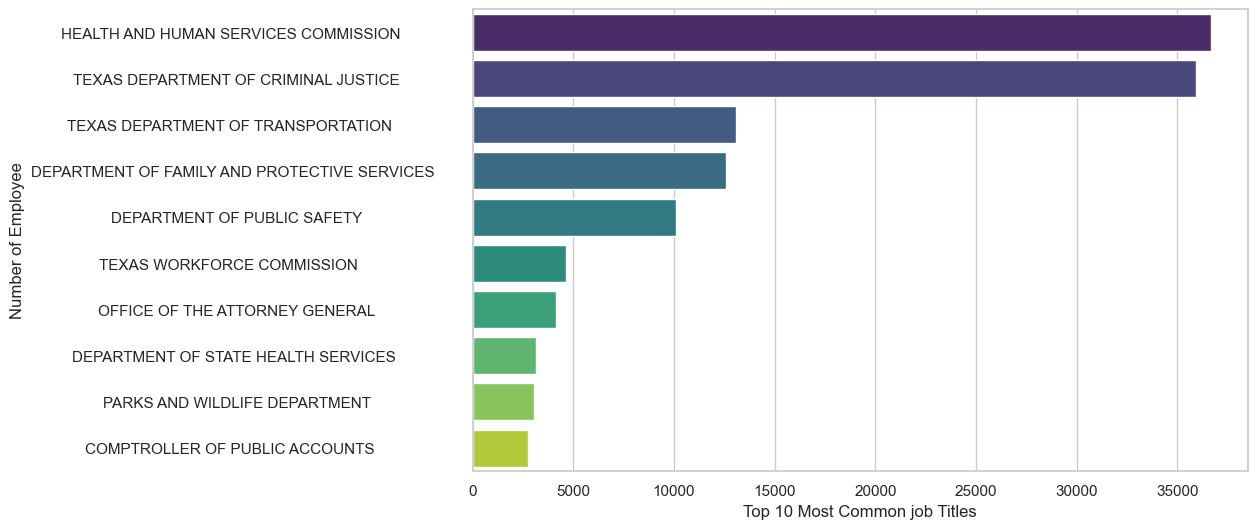

In [59]:
top_agencies = df['AGENCY_NAME'].value_counts().head(10)

plt.figure(figsize=(10,6)) # visualize data using matplotlib
sns.barplot(y = top_agencies.index,x=top_agencies.values,palette='viridis') # visualize data using seaborn
plt.xlabel('Top 10 Most Common job Titles') # visualize data using matplotlib
plt.ylabel('Number of Employee') # visualize data using matplotlib
plt.show() # visualize data using matplotlib

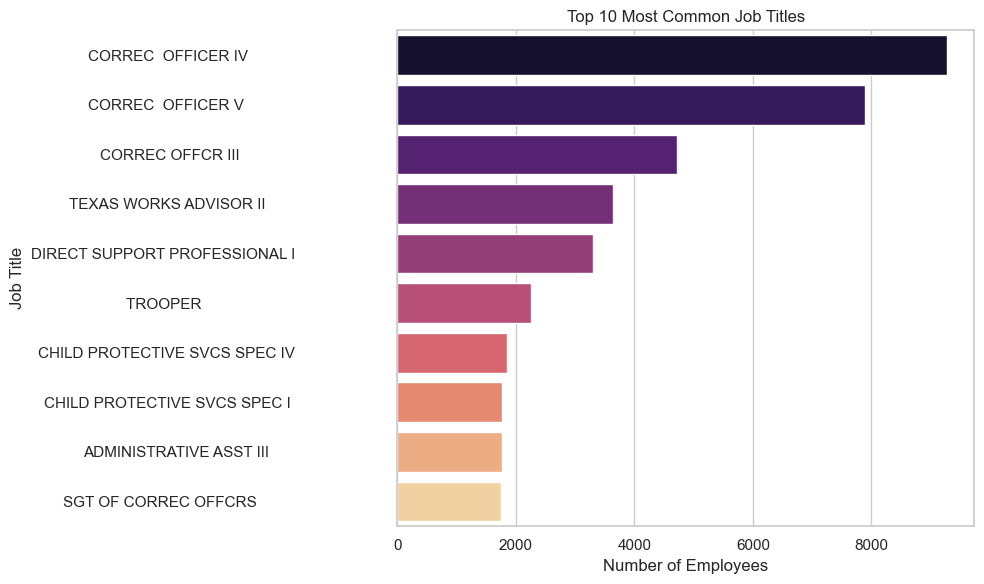

In [61]:
top_jobs = df['CLASS_TITLE'].value_counts().head(10)
# Plot: Most common job titles
plt.figure(figsize=(10, 6)) # visualize data using matplotlib
sns.barplot(y=top_jobs.index, x=top_jobs.values, palette='magma') # visualize data using seaborn
plt.title('Top 10 Most Common Job Titles') # visualize data using matplotlib
plt.xlabel('Number of Employees') # visualize data using matplotlib
plt.ylabel('Job Title') # visualize data using matplotlib
plt.tight_layout() # visualize data using matplotlib
plt.show() # visualize data using matplotlib

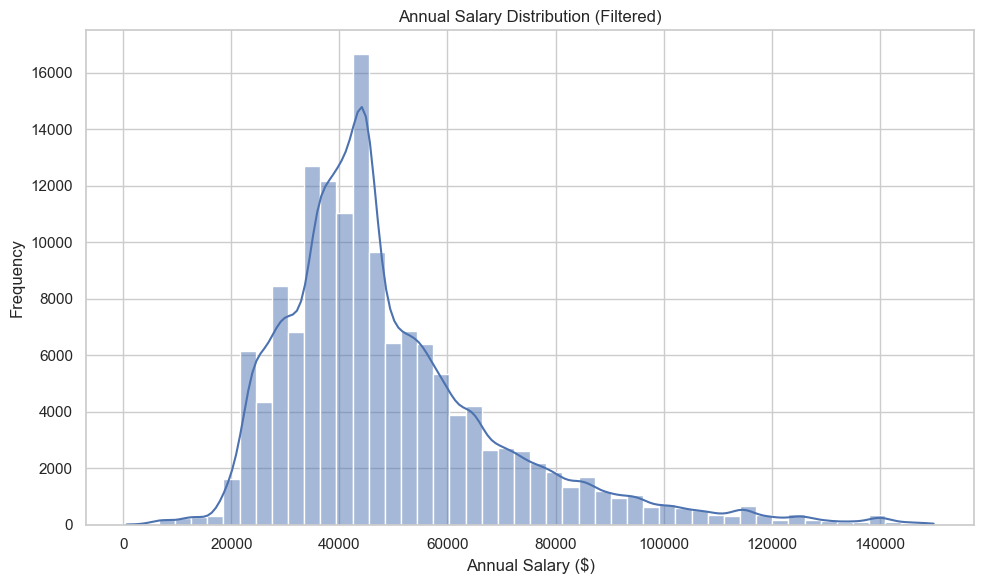

In [63]:
filtered_df = df[df['ANNUAL'] < df['ANNUAL'].quantile(0.99)]

plt.figure(figsize=(10, 6)) # visualize data using matplotlib
sns.histplot(filtered_df['ANNUAL'], bins=50, kde=True) # visualize data using seaborn
plt.title('Annual Salary Distribution (Filtered)') # visualize data using matplotlib
plt.xlabel('Annual Salary ($)') # visualize data using matplotlib
plt.ylabel('Frequency') # visualize data using matplotlib
plt.tight_layout() # visualize data using matplotlib
plt.show() # visualize data using matplotlib

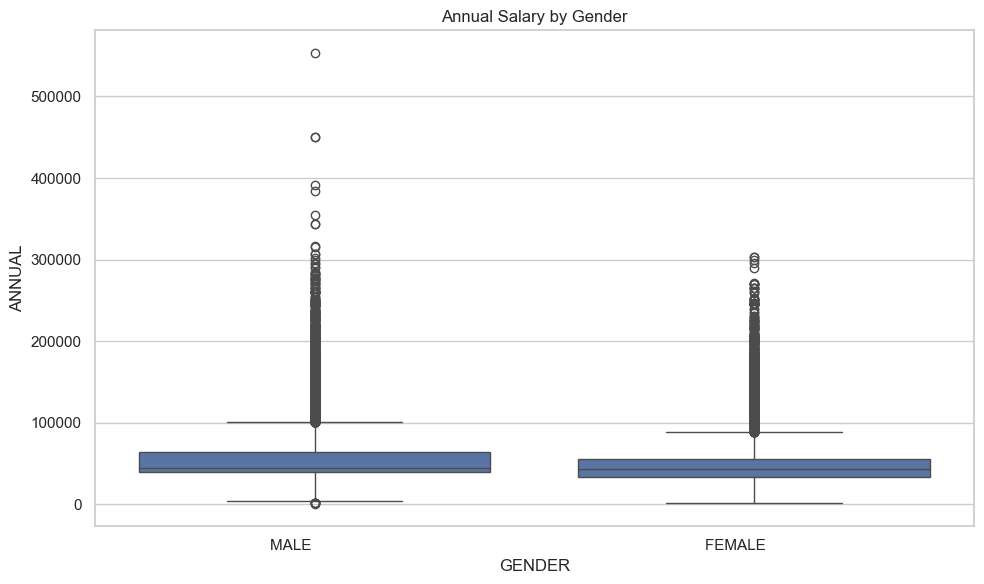

In [65]:
plt.figure(figsize=(10, 6)) # visualize data using matplotlib
sns.boxplot(data=df, x='GENDER', y='ANNUAL') # visualize data using seaborn
plt.title('Annual Salary by Gender') # visualize data using matplotlib
plt.tight_layout() # visualize data using matplotlib
plt.show() # visualize data using matplotlib

In [67]:
len(df.columns)

11

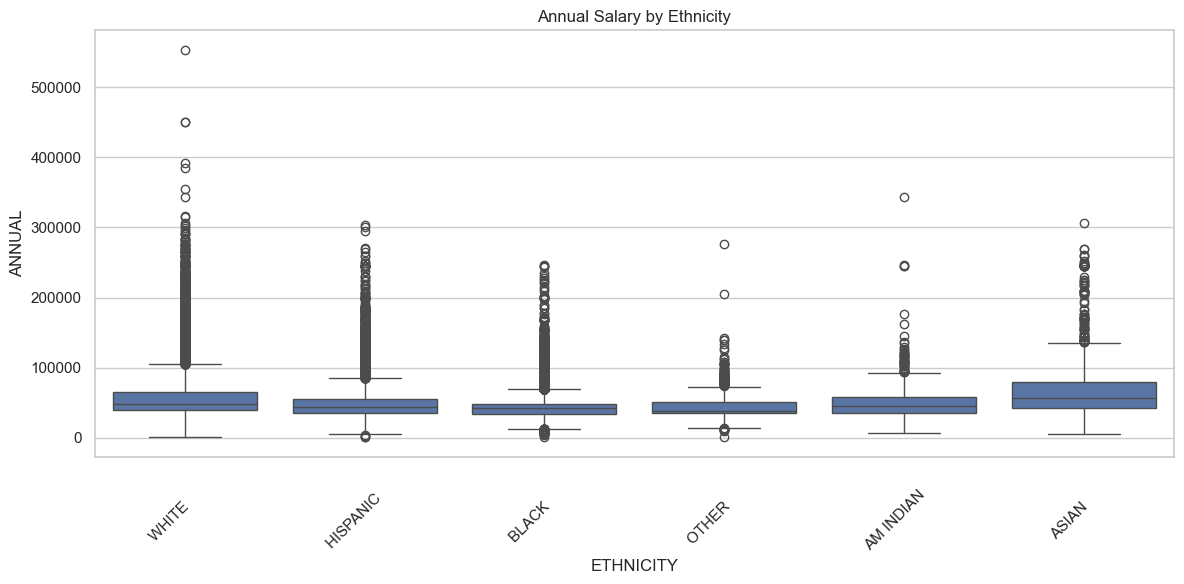

In [69]:
plt.figure(figsize=(12, 6)) # visualize data using matplotlib
sns.boxplot(data=df[df['ETHNICITY'] != ' '], x='ETHNICITY', y='ANNUAL') # visualize data using seaborn
plt.title('Annual Salary by Ethnicity') # visualize data using matplotlib
plt.xticks(rotation=45) # visualize data using matplotlib
plt.tight_layout() # visualize data using matplotlib
plt.show() # visualize data using matplotlib

In [71]:
agency_salary = df.groupby('AGENCY_NAME')['ANNUAL'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6)) # visualize data using matplotlib
sns.barplot(x=agency_salary.values, y=agency_salary.index, palette='cubehelix') # visualize data using seaborn
plt.title('Top 10 Agencies by Average Annual Salary') # visualize data using matplotlib
plt.xlabel('Average Salary ($)') # visualize data using matplotlib
plt.ylabel('Agency Name') # visualize data using matplotlib
plt.tight_layout() # visualize data using matplotlib
plt.show() # visualize data using matplotlib

## Report Of EDA

> * The analysis highlights significant wage disparities, a highly skewed salary distribution, and outliers that influence averages. Departments and roles play a critical role in determining compensation, with part-time and combined jobs often leading to discrepancies.Hourly rates, salaries, and working hours exhibit heavy right-skewed distributions.This EDA provides a foundation for informed decision-making regarding salary policies and resource allocation in Texas agencies.

## Feature Engineering

> * Feature engineering is an essential step in the data preprocessing process. By leveraging domain knowledge and creativity, you can transform raw data into meaningful features that enhance the performance of machine learning models. Creating new features or modifying existing ones can help the model capture more relevant patterns and relationships, ultimately improving its ability to make accurate predictions.

### Data Preprocessing

> * Data preprocessing is a foundational step in the machine learning pipeline. It involves cleaning, transforming, and organizing raw data into a format that is suitable for analysis and modeling. Proper data preprocessing ensures that the model performs optimally and provides reliable results. Below is a breakdown of the main steps involved in data preprocessing.

> * Handling missing values is an essential aspect of data preprocessing. Missing or incomplete data can lead to biased or inaccurate results, distorting the performance of statistical analyses and machine learning models. Here's a breakdown of why handling missing values is important and how to address them effectively:



In [76]:
## step 1: Handling the missing values.
df.isnull().sum() # check for missing values in each column

AGENCY_NAME     0
CLASS_CODE      0
CLASS_TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
HRLY_RATE       0
HRS_PER_WK      0
MONTHLY         0
ANNUAL          0
STATE_NUMBER    0
dtype: int64

* It gives the no null value in dataframe.

Encoding Categorical Variables : Categorical variables need to be transformed into numerical formats for machine learning models.

* Label Encoding
* One-Hot Encoding
* Ordinal Encoding

In [80]:
#importing Label from preprocessing
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()                                # Initialize the LabelEncoder

# Step 1: Filter relevant columns
num_col = ['HRLY_RATE','HRS_PER_WK','STATE_NUMBER','MONTHLY']
features = ['AGENCY_NAME', 'CLASS_TITLE', 'GENDER', 'ETHNICITY','CLASS_CODE']
target = 'ANNUAL'
df_encoded = df[features + [target] + num_col].dropna()

In [82]:
# Step 2: Encode categorical variables
label_encoders = {}
for col in features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [84]:
df_encoded

AGENCY_NAME  CLASS_TITLE  GENDER  ETHNICITY  CLASS_CODE     ANNUAL  \
0                17          711       1          5        1409  114549.84   
1                48          560       1          5         616   16857.24   
2                17          711       1          5        1409  114549.84   
3                48          560       1          5         616   16857.24   
4                88          292       0          3         810   39411.24   
...             ...          ...     ...        ...         ...        ...   
149476           76         1198       1          5        1042   34788.00   
149477           76         1404       0          5          84   66000.00   
149478           76          324       1          5           4   13447.20   
149479           76         1007       1          5         278   68929.92   
149480           76          324       0          5           4   12209.52   

        HRLY_RATE  HRS_PER_WK  STATE_NUMBER  MONTHLY  
0        75.96150        29.0        127717  9545.82  
1        81.04454         4.0        127717  1404.77  
2        75.96150        29.0         59115  9545.82  
3        81.04453         4.0         59115  1404.77  
4         0.00000        40.0        165030  3284.27  
...           ...         ...           ...      ...  
149476    0.00000        40.0        770781  2899.00  
149477    0.00000        40.0        847431  5500.00  
149478   12.93000        20.0         34266  1120.60  
149479    0.00000        40.0        123490  5744.16  
149480   11.74000        20.0        103583  1017.46  

[149481 rows x 10 columns]

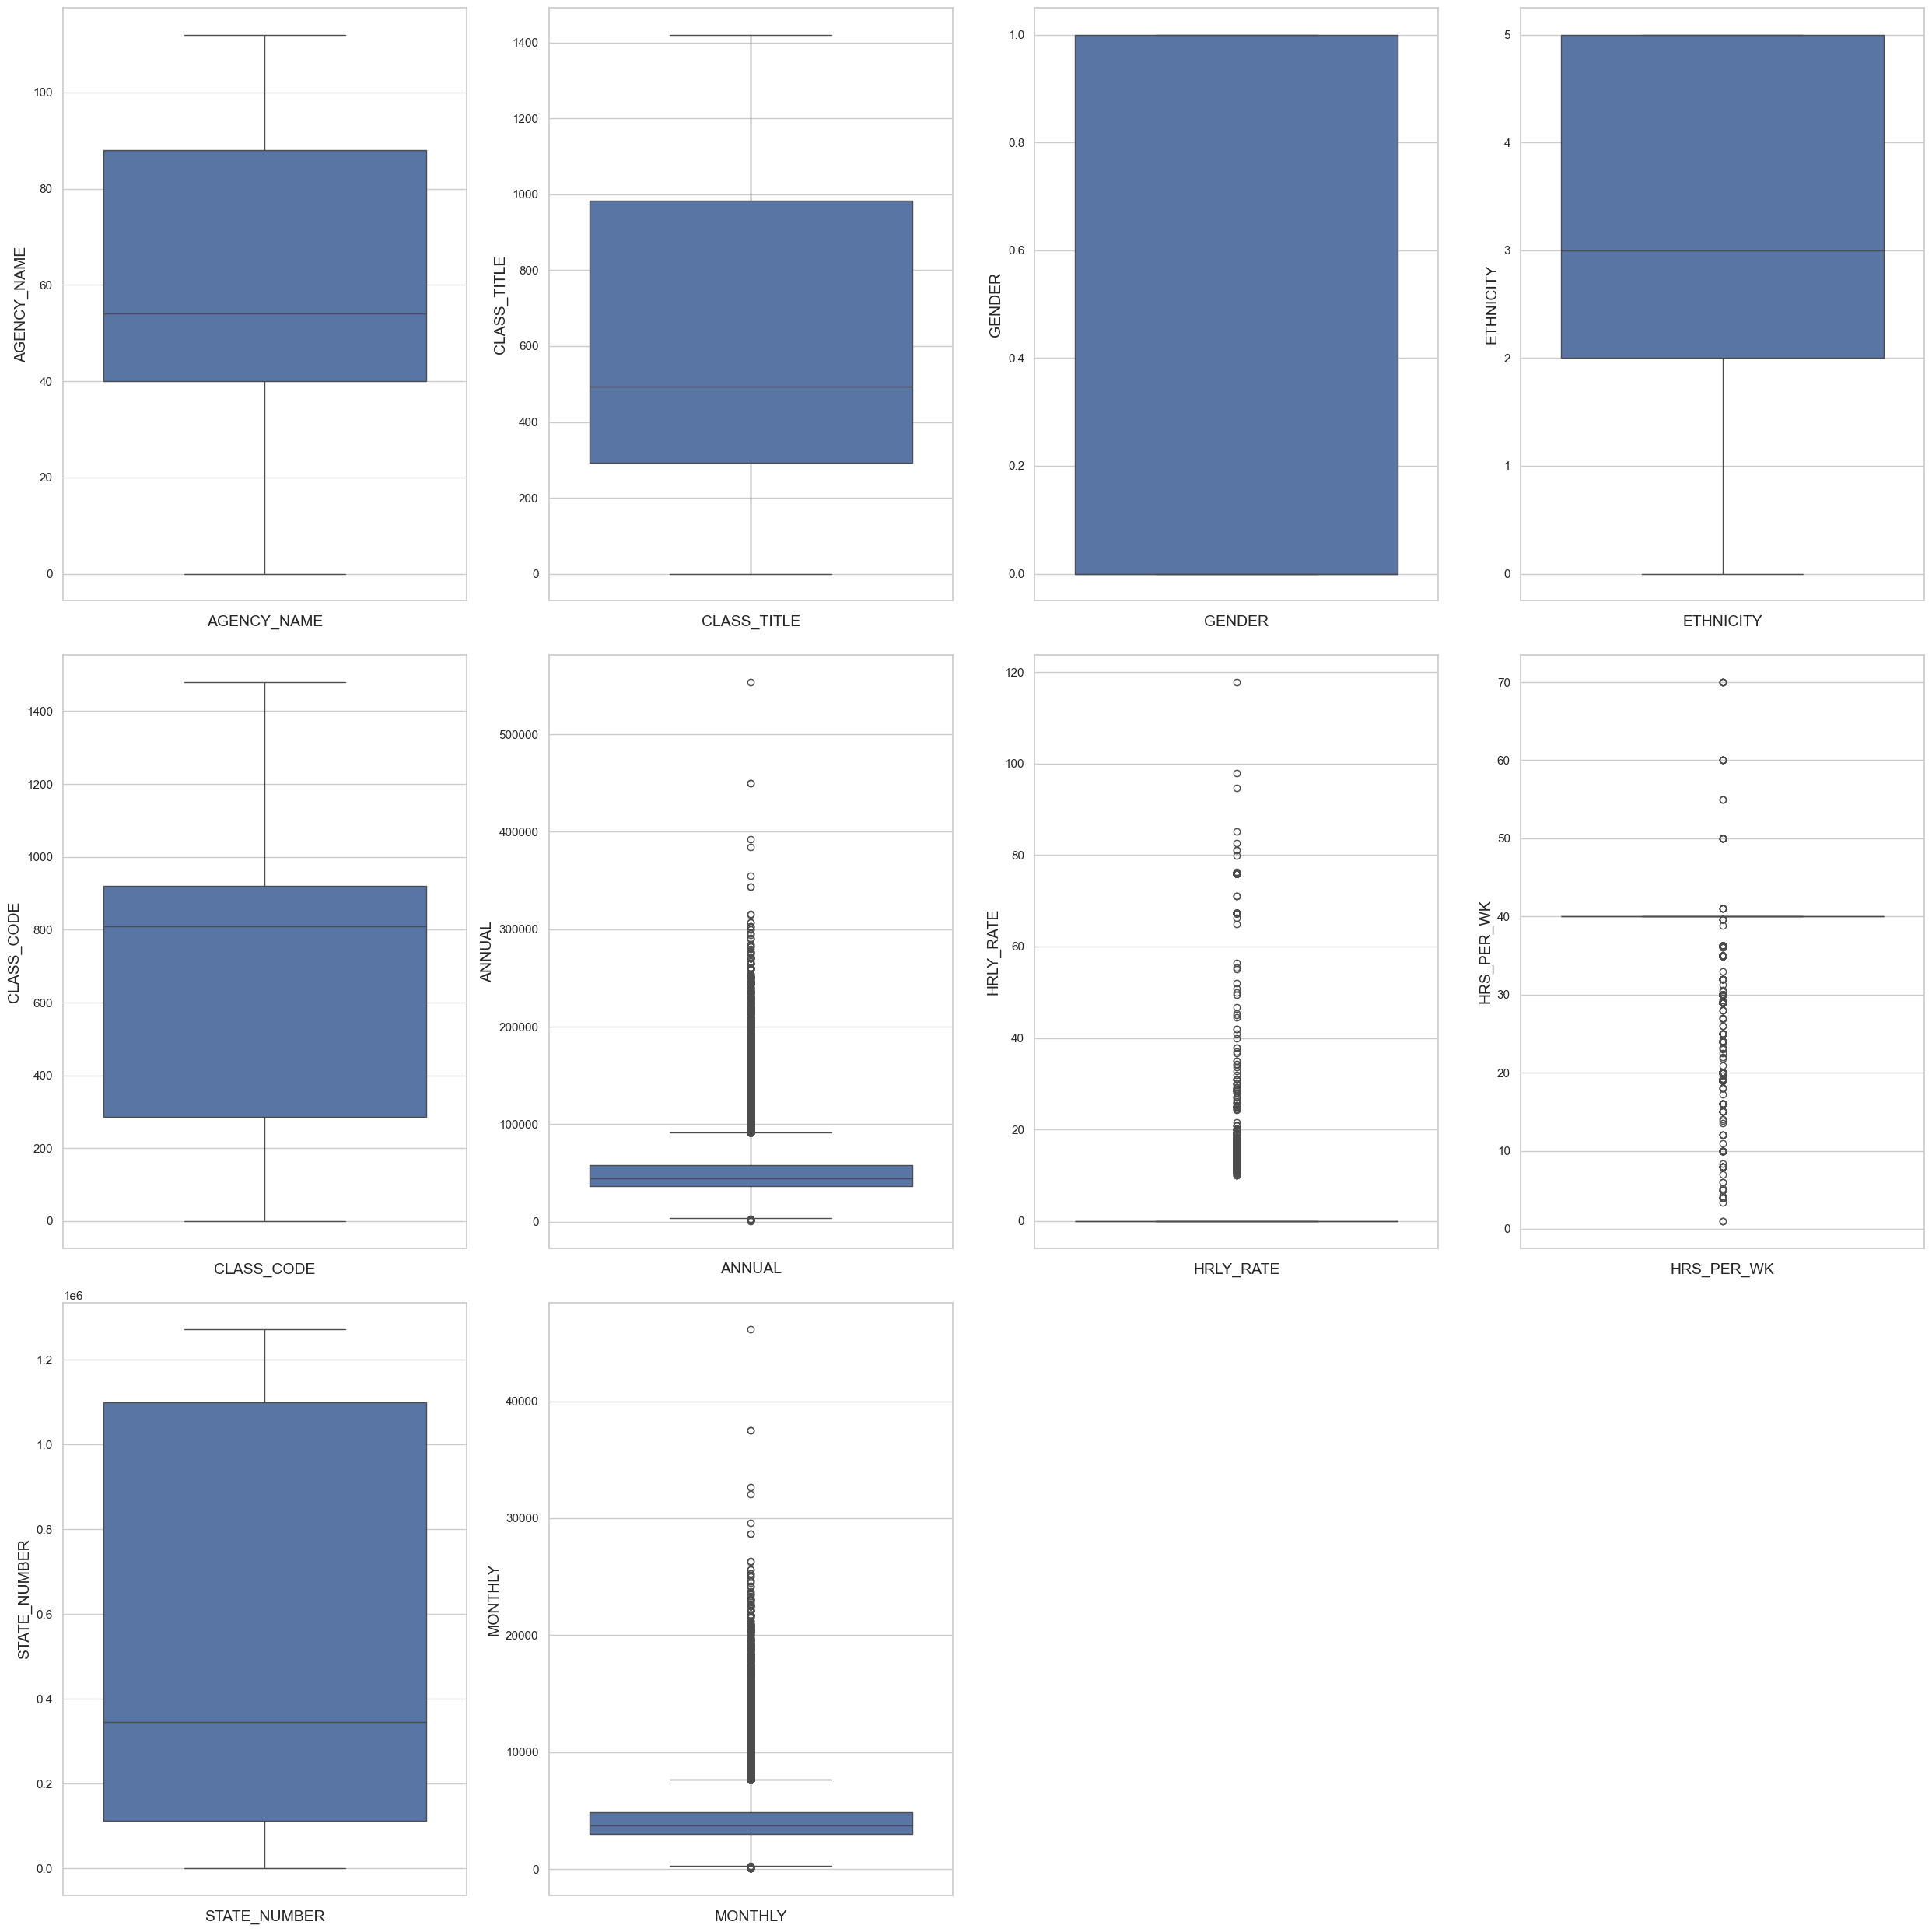

In [86]:
#checking outliers
plt.figure(figsize=(25,25))    #define a figure size # visualize data using matplotlib
plot_num=1
for i in df_encoded.columns:
        plt.subplot(3,4,plot_num)                #create rows and column grid in 4x4 # visualize data using matplotlib
        sns.boxplot(df_encoded[i])                 # Create boxplot using of check outliers # visualize data using seaborn
        plt.xlabel(i,fontsize=14)            # X-axis label # visualize data using matplotlib
        plt.ylabel(i,fontsize=14)            # Y-axis label # visualize data using matplotlib
        plot_num+=1
plt.tight_layout()     # show the data # visualize data using matplotlib

In [88]:
Q1 = df_encoded['MONTHLY'].quantile(0.25)
Q3 = df_encoded['MONTHLY'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_encoded = df_encoded[(df_encoded['MONTHLY'] >= lower_bound) & (df_encoded['MONTHLY'] <= upper_bound)]

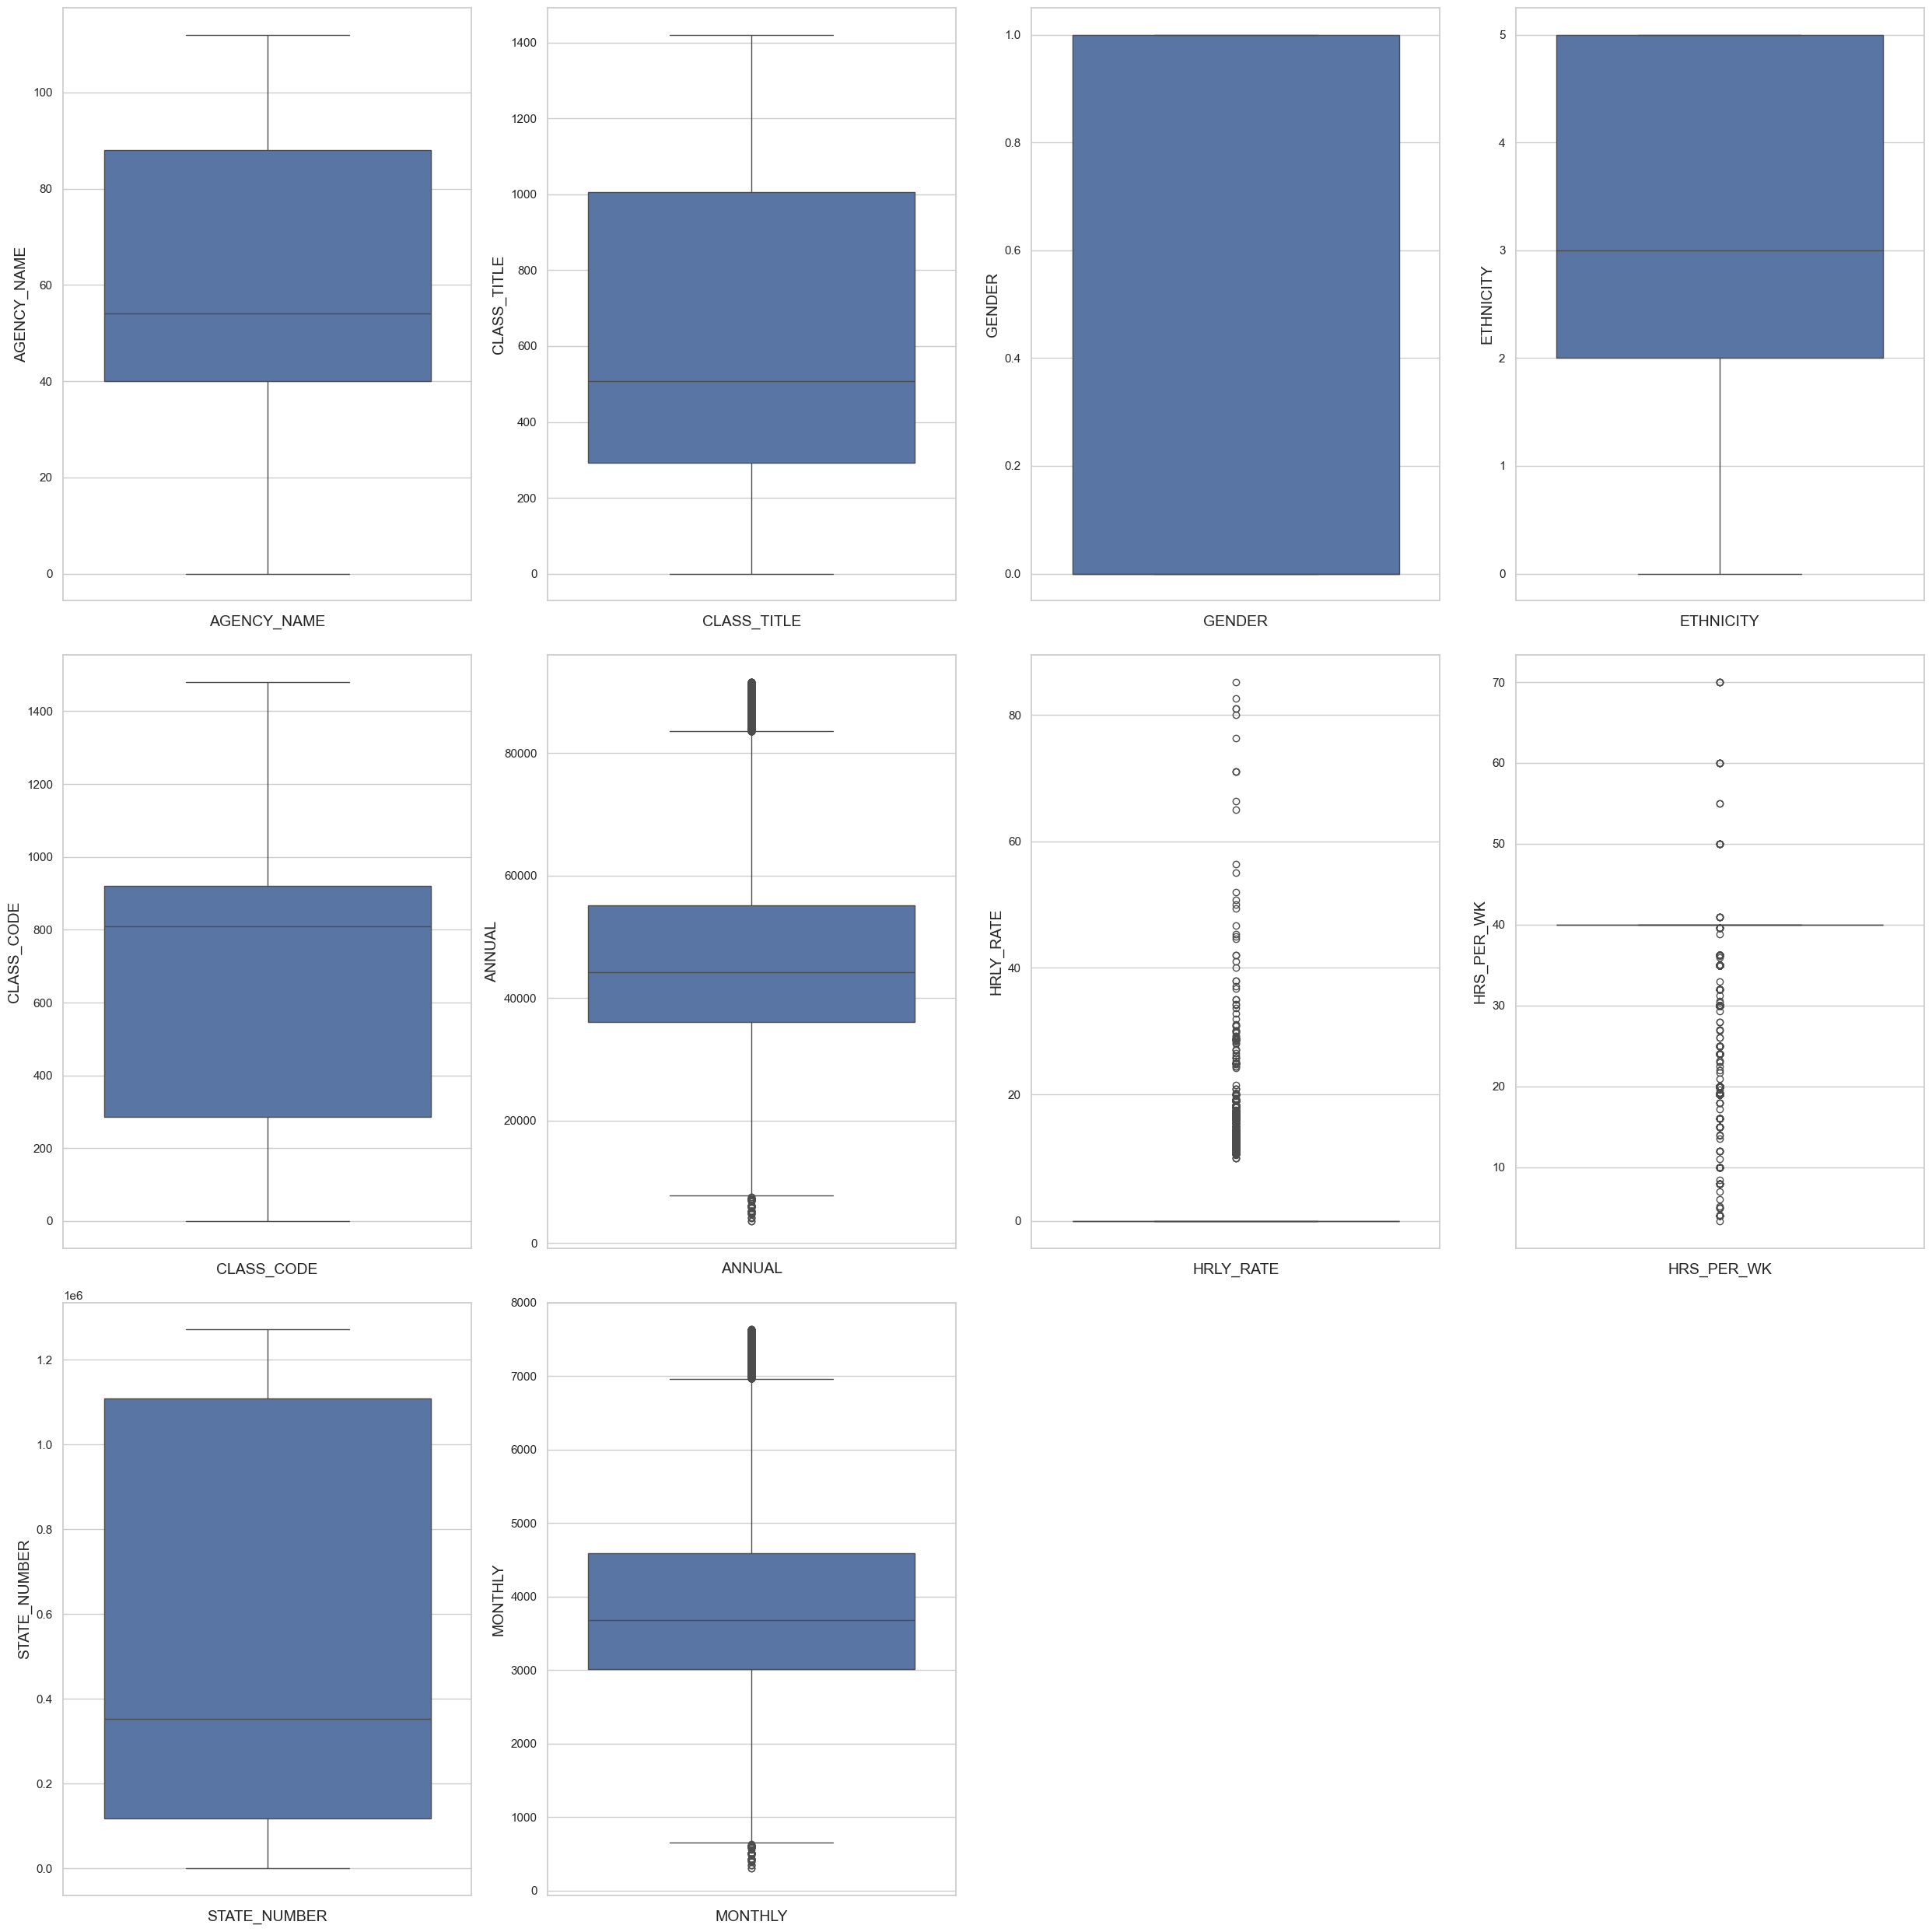

In [90]:
#checking outliers
plt.figure(figsize=(25,25))    #define a figure size # visualize data using matplotlib
plot_num=1
for i in df_encoded.columns:
        plt.subplot(3,4,plot_num)                #create rows and column grid in 4x4 # visualize data using matplotlib
        sns.boxplot(df_encoded[i])                 # Create boxplot using of check outliers # visualize data using seaborn
        plt.xlabel(i,fontsize=14)            # X-axis label # visualize data using matplotlib
        plt.ylabel(i,fontsize=14)            # Y-axis label # visualize data using matplotlib
        plot_num+=1
plt.tight_layout()     # show the data # visualize data using matplotlib

In [92]:
# we need to remove HRLY_RATE and HRS_PER_WK
# df.drop(['HRLY_RATE','HRS_PER_WK','STATUS'],axis=1,inplace=True)

## Feature Selection

<b>Feature selection :</b> is a critical step in the data preprocessing pipeline, where the goal is to select the most important features from the original set of features in a dataset. By choosing only the relevant features, we aim to improve the performance of machine learning models. This process can help reduce complexity, improve model accuracy, and speed up the training process.

In [96]:
df_encoded.corr()  #check corrlation

AGENCY_NAME  CLASS_TITLE    GENDER  ETHNICITY  CLASS_CODE  \
AGENCY_NAME      1.000000    -0.157584  0.208977   0.043441   -0.029299   
CLASS_TITLE     -0.157584     1.000000  0.063164   0.056399    0.160031   
GENDER           0.208977     0.063164  1.000000   0.100939    0.136485   
ETHNICITY        0.043441     0.056399  0.100939   1.000000   -0.066428   
CLASS_CODE      -0.029299     0.160031  0.136485  -0.066428    1.000000   
ANNUAL          -0.071040     0.188570  0.112184   0.147820   -0.116185   
HRLY_RATE        0.041802    -0.006661  0.029876   0.030878   -0.009664   
HRS_PER_WK      -0.033345     0.018677  0.009098  -0.016441   -0.044069   
STATE_NUMBER     0.015926    -0.101743  0.009046  -0.059390    0.045430   
MONTHLY         -0.071040     0.188570  0.112184   0.147820   -0.116185   

                ANNUAL  HRLY_RATE  HRS_PER_WK  STATE_NUMBER   MONTHLY  
AGENCY_NAME  -0.071040   0.041802   -0.033345      0.015926 -0.071040  
CLASS_TITLE   0.188570  -0.006661    0.018677     -0.101743  0.188570  
GENDER        0.112184   0.029876    0.009098      0.009046  0.112184  
ETHNICITY     0.147820   0.030878   -0.016441     -0.059390  0.147820  
CLASS_CODE   -0.116185  -0.009664   -0.044069      0.045430 -0.116185  
ANNUAL        1.000000  -0.099007    0.185100     -0.292881  1.000000  
HRLY_RATE    -0.099007   1.000000   -0.300948      0.069118 -0.099007  
HRS_PER_WK    0.185100  -0.300948    1.000000     -0.016695  0.185100  
STATE_NUMBER -0.292881   0.069118   -0.016695      1.000000 -0.292881  
MONTHLY       1.000000  -0.099007    0.185100     -0.292881  1.000000

<Axes: >

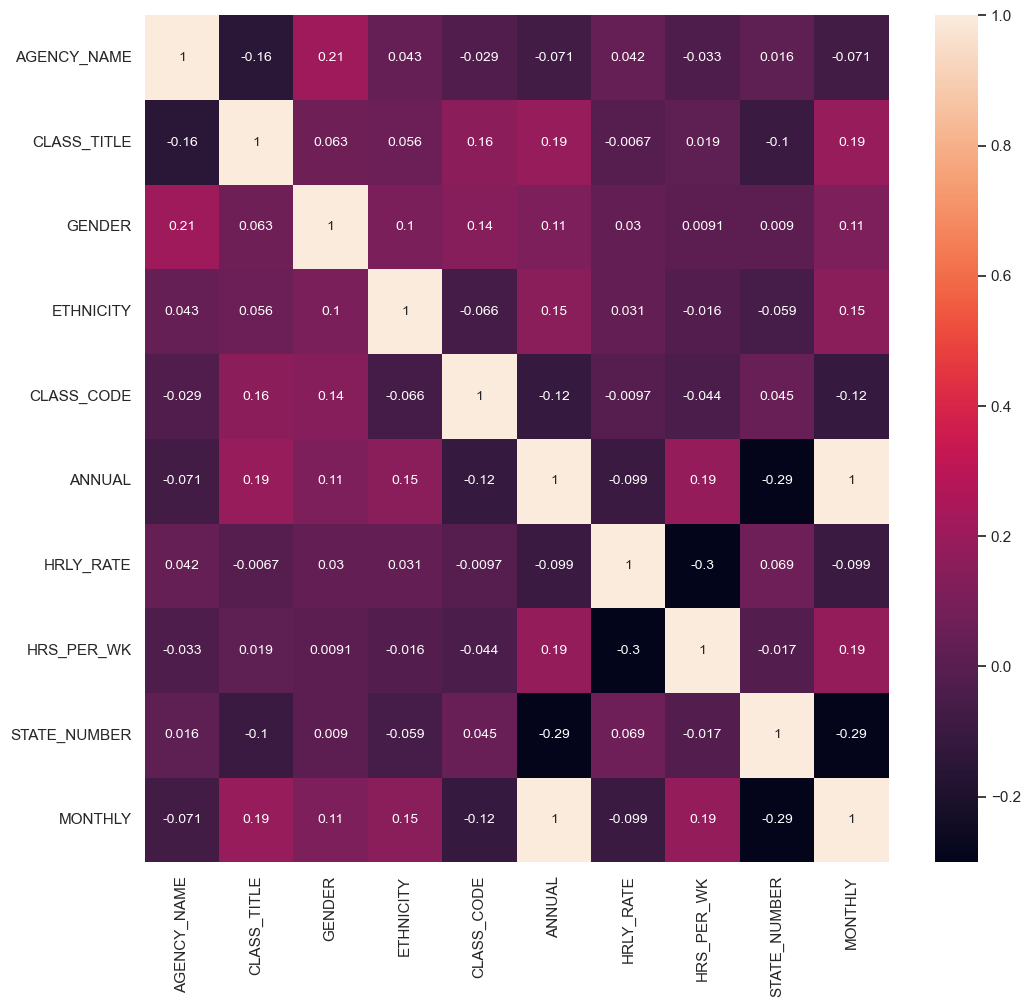

In [98]:
## We have check correlation
plt.figure(figsize=(12,11))                                #increase plot size # visualize data using matplotlib
sns.heatmap(df_encoded.corr(),annot_kws={'size':10},annot=True)  # craete a heatmap check the relationship # visualize data using seaborn

In [100]:
# Step 3: Train/Test split
X = df_encoded.drop('ANNUAL',axis=1)
y = df_encoded['ANNUAL']

In [102]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso # import linear regression model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

<b>Scaling :</b> is an essential technique in the data preprocessing stage, particularly for continuous features.Scaling helps to standardize the range of features, making them comparable and improving model performance.

* It is technique to convert all data into certain range.

<b>The types of scalling are :</b>
1) Min-Max Scaling : Min-Max scaling transforms the data to a specific range, usually between 0 and 1. The values are rescaled according to the minimum and maximum values of the feature.
2) Standardization : - Standardization Scaling transform all data between -3 to +3 range. it use z-score to tranform data.

In [127]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [129]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [131]:
X_scaled_df

AGENCY_NAME  CLASS_TITLE    GENDER  ETHNICITY  CLASS_CODE  HRLY_RATE  \
1         -0.440685    -0.163877  1.178098   1.069280   -0.059983  46.514931   
3         -0.440685    -0.163877  1.178098   1.069280   -0.059983  46.514925   
4          0.952677    -0.820616 -0.848826  -0.410803    0.458682  -0.089236   
6          1.057179    -0.845121  1.178098   1.069280   -0.666875  -0.089236   
8         -1.973383    -0.342765  1.178098   1.069280    1.987943  28.322055   
...             ...          ...       ...        ...         ...        ...   
149476     0.534669     1.399556  1.178098   1.069280    1.078942  -0.089236   
149477     0.534669     1.904363 -0.848826   1.069280   -1.482302  -0.089236   
149478     0.534669    -0.742200  1.178098   1.069280   -1.696185   7.346082   
149479     0.534669     0.931506  1.178098   1.069280   -0.963637  -0.089236   
149480     0.534669    -0.742200 -0.848826   1.069280   -1.696185   6.661780   

        HRS_PER_WK  STATE_NUMBER   MONTHLY  
1       -15.515200     -0.944940 -1.874566  
3       -15.515200     -1.087845 -1.874566  
4         0.116280     -0.867213 -0.429761  
6         0.116280      1.050396  1.531413  
8        -8.567876     -0.904076  0.337173  
...            ...           ...       ...  
149476    0.116280      0.394626 -0.725925  
149477    0.116280      0.554295  1.273509  
149478   -8.567876     -1.139608 -2.093012  
149479    0.116280     -0.953745  1.461199  
149480   -8.567876     -0.995214 -2.172298  

[140450 rows x 9 columns]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4) # split data into training and test sets

In [135]:
models = {
    'Linear Regression': LinearRegression(), # import linear regression model
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    # 'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(),
    'ML_Regressor' : MLPRegressor(),
    'B_Regressor' : BaggingRegressor(),
}

In [137]:
results = []

# Loop through each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train) # train the model on training data
    
    y_pred = model.predict(X_test) # make predictions using the model
    
    mse = mean_squared_error(y_test, y_pred) # evaluate model performance
    r2 = r2_score(y_test, y_pred) # evaluate model performance

    print(f"- MSE Score: {mse:.4f}")
    print(f"- R2 Score: {r2:.4f}")
    print("----------------------")
    print('-' * 34 + '\n')
    

    results.append({
        'Model': name,
        'MSE': round(mse, 2),
        'R² Score': round(r2, 4)
    })
    

Training Linear Regression...
- MSE Score: 0.0000
- R2 Score: 1.0000
----------------------
----------------------------------

Training Ridge Regression...
- MSE Score: 0.0000
- R2 Score: 1.0000
----------------------
----------------------------------

Training Lasso Regression...
- MSE Score: 0.0000
- R2 Score: 1.0000
----------------------
----------------------------------

Training Decision Tree...
- MSE Score: 24.2031
- R2 Score: 1.0000
----------------------
----------------------------------

Training Random Forest...
- MSE Score: 13.0551
- R2 Score: 1.0000
----------------------
----------------------------------

Training Gradient Boosting...
- MSE Score: 13883.2471
- R2 Score: 0.9999
----------------------
----------------------------------

Training K-Nearest Neighbors...
- MSE Score: 3202254.9559
- R2 Score: 0.9869
----------------------
----------------------------------

Training XGBoost...
- MSE Score: 21730.0208
- R2 Score: 0.9999
----------------------
--------------

In [139]:
# Convert results to DataFrame for better display
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
print(results_df)

                 Model         MSE  R² Score
0    Linear Regression        0.00    1.0000
1     Ridge Regression        0.00    1.0000
2     Lasso Regression        0.00    1.0000
3        Decision Tree       24.20    1.0000
4        Random Forest       13.06    1.0000
8         ML_Regressor      645.05    1.0000
9          B_Regressor       19.05    1.0000
5    Gradient Boosting    13883.25    0.9999
7              XGBoost    21730.02    0.9999
6  K-Nearest Neighbors  3202254.96    0.9869


In [141]:
results_df['R² Score'] = results_df['R² Score']*100
Gradient Boosting

In [165]:
best_model = models['Gradient Boosting']

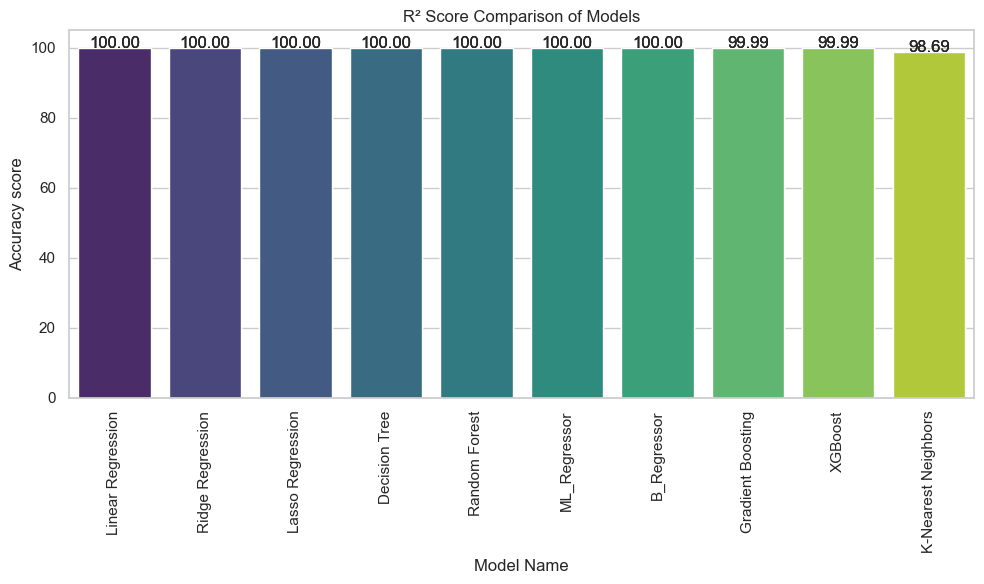

In [145]:
plt.figure(figsize=(10, 6)) # visualize data using matplotlib
num = 0
for i in results_df :
    if num <= 7:
        a = sns.barplot(x='Model', y='R² Score', data=results_df,palette='viridis') # visualize data using seaborn
        plt.title('R² Score Comparison of Models') # visualize data using matplotlib
        plt.xlabel('Model Name') # visualize data using matplotlib
        plt.ylabel('Accuracy score') # visualize data using matplotlib
        # plt.ylim(0, 1.1) # visualize data using matplotlib
        plt.xticks(rotation=90) # visualize data using matplotlib
        
        for index,value in enumerate(results_df['R² Score']):
            a.text(index,value + 0.02 , f'{value:.2f}',ha='center')

        num += 1

plt.tight_layout() # visualize data using matplotlib
plt.show() # visualize data using matplotlib

## What deparments/roles have the biggest wage disparities between manager and employees?

In [148]:
# Standardize role labels for better comparison
data['CLASS TITLE'] = data['CLASS TITLE'].str.lower()

# Create a manager indicator based on title keywords
data['is_manager'] = data['CLASS TITLE'].str.contains('manager|director|chief|officer|executive', case=False)

# Group by department and manager status
wage_gap = data.groupby(['AGENCY NAME', 'is_manager'])['ANNUAL'].mean().unstack()

# Calculate wage disparity
wage_gap['wage_disparity'] = wage_gap[True] - wage_gap[False]
wage_gap_sorted = wage_gap.sort_values(by='wage_disparity', ascending=False)

# Show top departments with biggest wage disparities
wage_gap_sorted[['wage_disparity']].head(10)


is_manager                                          wage_disparity
AGENCY NAME                                                       
CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS    121342.701429
THIRD COURT OF APPEALS DISTRICT                       95191.691613
SECOND COURT OF APPEALS DISTRICT                      94662.891429
THIRTEENTH COURT OF APPEALS DISTRICT                  90951.455172
FIFTH COURT OF APPEALS DISTRICT                       90390.235932
TEACHER RETIREMENT SYSTEM                             89834.811547
OFFICE OF CAPITAL AND FORENSIC WRITS                  86938.722000
LEGISLATIVE REFERENCE LIBRARY                         85730.596364
TWELFTH COURT OF APPEALS DISTRICT                     84625.011429
EMPLOYEES RETIREMENT SYSTEM                           81545.177066

In [150]:
# Plot top departments by wage disparity
top_disparities = wage_gap_sorted[['wage_disparity']].head(10)
top_disparities.plot(kind='bar', figsize=(10, 6), title="Top 10 Departments by Wage Disparity")
plt.ylabel('Wage Disparity')
plt.xlabel('Agency Name')
plt.xticks(rotation=90,fontsize=9)
plt.show()

### **Key Insights on Wage Disparity**

1. **High Wage Disparity**: 
   - At the top is the **Cancer Prevention and Research Institute of Texas**, where managers earn, on average, over \$120 k more than non‑managerial staff.  
   - Close behind are several Appeals Courts (Third, Second, Thirteenth, Fifth) and the **Teacher Retirement System**, each showing a difference of roughly \$90 k–\$95 k.

2. **Low Wage Disparity**:
   - Even at the lower end of our top ten, agencies like the **Employees Retirement System** display an \$81 k gap, underscoring that pay inequality is widespread, even where it appears “modest.”

3. **Impact**:
   - Large pay gaps can undermine morale, encourage high turnover among non‑managers, and fuel perceptions of unfairness.  
   - Smaller gaps may reflect specialized roles or skill premiums, but any disparity should be justified and transparent.

4. **Recommendations**:
   - Conduct regular pay audits and ensure transparency to address unfair disparities.



In [153]:
# Convert EMPLOY DATE to datetime and extract year
data['EMPLOY DATE'] = pd.to_datetime(data['EMPLOY DATE'], errors='coerce')
data['EMPLOY_YEAR'] = data['EMPLOY DATE'].dt.year

# Group by year and calculate mean salary and number of employees
yearly_stats = data.groupby('EMPLOY_YEAR').agg({
    'ANNUAL': 'mean',
    'FIRST NAME': 'count'  # counting unique rows as headcount approximation
}).rename(columns={'ANNUAL': 'Avg Salary', 'FIRST NAME': 'Headcount'}).dropna()


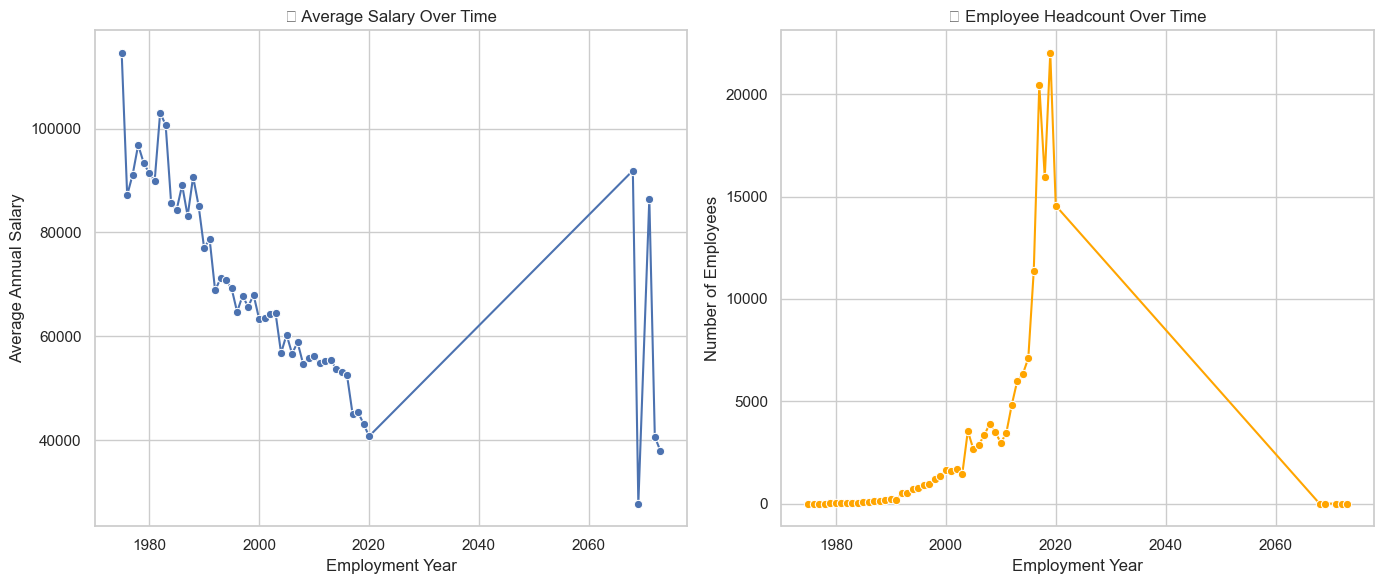

In [154]:
# Plotting trends
plt.figure(figsize=(14, 6))

# Average Salary Trend
plt.subplot(1, 2, 1)
sns.lineplot(data=yearly_stats, x=yearly_stats.index, y='Avg Salary', marker='o')
plt.title('📈 Average Salary Over Time')
plt.ylabel('Average Annual Salary')
plt.xlabel('Employment Year')

# Headcount Trend
plt.subplot(1, 2, 2)
sns.lineplot(data=yearly_stats, x=yearly_stats.index, y='Headcount', marker='o', color='orange')
plt.title('👥 Employee Headcount Over Time')
plt.ylabel('Number of Employees')
plt.xlabel('Employment Year')

plt.tight_layout()
plt.show()


## Model Comparision Report

*  I have used total 10 Algorithm like Random Forest, B_Regressor, Gradient Boosting,Decision Tree, XGBoost, K-Nearest Neighbors, 
   ML_Regressor,Linear Regression, Ridge Regression, Lasso Regression
* Best Model: Random Forest, B_Regressor, Decision Tree,ML_Regressor,Linear Regression, Ridge Regression, Lasso Regression achieves the 
  highest R² score 100 % suggesting it perfectly explains the variance in payroll data.
* Gradient Boosting & XGBoost achieving an R² score of 99.99%. near 100%
*  K-Nearest Neighbors achieving an R² score of 98.69%

## Final Report 
> * I have implemented 10 algorithms in analysis, which include Random Forest, B_Regressor, Gradient Boosting,Decision Tree, XGBoost, K-Nearest Neighbors, ML_Regressor,Linear Regression, Ridge Regression, Lasso Regression
> * I have calculated the R² score, Mean Absolute Error (MAE), and Mean Squared Error (MSE) to evaluate the performance of the best models.
> * The Random Forest, B_Regressor, Decision Tree,ML_Regressor,Linear Regression, Ridge Regression, Lasso Regression model has shown outstanding performance, achieving an R² score of 100.00%.
> * Gradient Boosting & XGBoost achieving an R² score of 99.99%.
> * K-Nearest Neighbors achieving an R² score of 98.69%

In [167]:
import pickle                             #Importing the pickle module
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)                    #save it to the file

In [180]:
with open("best_model.pkl","rb") as f:   #Open the file "best_model.pkl" in read-binary mode
  model=pickle.load(f)

In [171]:
model

GradientBoostingRegressor()